## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1019 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [160]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [161]:
df.head()  # Display the first few rows of the dataframe to verify successful loading

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [162]:
df.shape # Display the shape of the dataframe to understand its dimensions

(1019, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [163]:
df.isna().sum()  # Check for missing values in the dataset

gender                         1
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  0
writing score                  0
dtype: int64

In [164]:
df.isnull().sum()  # Check for missing values in each column

gender                         1
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  0
writing score                  0
dtype: int64

#### There are missing values for gender and math score columns.
#### Let's fill the missing values with the mode of the respective columns.

In [165]:
df[df['gender'].isnull() | df['math score'].isnull()]  # Display rows with missing values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
190,FEMALE,group C,some college,standard,completed,NaN,91,87
192,NaN,group B,associate's degree,free/reduced,none,50,59,46


In [166]:
df['math score'].describe()  # Get descriptive statistics for the 'math score' column

count     1018
unique      84
top         65
freq        36
Name: math score, dtype: object

In [167]:
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')  # Convert to numeric, set errors to NaN
maths_mean = df['math score'].mean()  # Calculate the mean of the 'math score' column
maths_mode = df['math score'].mode()[0]  # Get the mode of the 'math score' column
maths_mean, maths_mode  # Display the mean and mode of the 'math score' column

(np.float64(66.06791338582677), np.float64(65.0))

#### We can replace maths score missing values with the mean

In [168]:
df['math score'].fillna(df['math score'].mode()[0], inplace=True)  # Fill missing math scores with the mode

In [169]:
df[df['gender'].isnull() | df['math score'].isnull()]  # Display rows with missing values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
192,NaN,group B,associate's degree,free/reduced,none,50.0,59,46


In [170]:
df.gender.value_counts()  # Count the number

gender
female      527
male        488
FEMALE        2
 Female       1
Name: count, dtype: int64

In [171]:
## Replace na values in gender with mode
gender_mode = df['gender'].mode()[0]  # Get the mode of
gender_mode

'female'

In [172]:
df.gender.fillna(gender_mode, inplace=True)  # Fill missing

In [173]:
df[df['gender'].isnull() | df['math score'].isnull()]  # Display rows with missing values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


#### There is no missing values in the dataset after filling the missing values.

### 3.2 Check Duplicates

In [174]:
df.duplicated().sum()  # Check for duplicate rows in the DataFrame

np.int64(1)

In [175]:
## Find duplicate rows
duplicates = df[df.duplicated()]

In [176]:
duplicates

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
194,female,group B,master's degree,standard,none,90.0,95,93


In [177]:
## Remove duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicate rows from the DataFrame
df.duplicated().sum()  # Check again for duplicate rows to confirm removal


np.int64(0)

#### We have removed the duplicate rows from the dataset.

### 3.3 Check data types

In [178]:
df.info()  # Display information about the dataframe, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1018 non-null   object 
 1   race/ethnicity               1018 non-null   object 
 2   parental level of education  1018 non-null   object 
 3   lunch                        1018 non-null   object 
 4   test preparation course      1018 non-null   object 
 5   math score                   1018 non-null   float64
 6   reading score                1018 non-null   int64  
 7   writing score                1018 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 71.6+ KB


### 3.4 Checking the number of unique values of each column

In [179]:
df.nunique()  # Display the number of unique values in each column

gender                          4
race/ethnicity                  5
parental level of education     7
lunch                           2
test preparation course         2
math score                     82
reading score                  73
writing score                  77
dtype: int64

In [180]:
df.gender.value_counts()  # Count the number

gender
female      527
male        488
FEMALE        2
 Female       1
Name: count, dtype: int64

#### From above we can see gor gender column there are female, FEMALE, Female this kind of values. We can convert all the values to lower case.

In [181]:
df.gender.replace(to_replace=['FEMALE','Female',' Female '],value='female',inplace=True) 

In [182]:
df.gender.value_counts()  # Count the number

gender
female    530
male      488
Name: count, dtype: int64

In [183]:
df['race/ethnicity'].value_counts()  # Count the number of unique values in

race/ethnicity
group C    326
group D    264
group B    196
group E    141
group A     91
Name: count, dtype: int64

#### No issue for race/ethnicity  

In [184]:
df['parental level of education'].value_counts()  # Count the number of unique values in parental level of education column

parental level of education
some college          230
associate's degree    225
high school           197
some high school      181
bachelor's degree     121
master's degree        62
 High School            2
Name: count, dtype: int64

#### For parental level of education column, we can see there are some values like 'high school' and 'High School'. We can convert all the values to lower case.

In [185]:
df['parental level of education'].replace(to_replace=['High School',' High School '], value='high school', inplace=True)  # Convert all values to lower case

In [186]:
df['parental level of education'].value_counts()  # Count the number of unique values in parental level of education column

parental level of education
some college          230
associate's degree    225
high school           199
some high school      181
bachelor's degree     121
master's degree        62
Name: count, dtype: int64

In [187]:
for key, val in df['parental level of education'].value_counts().items():
    print(key)  # Print each unique value in the parental level of education column
    print('---')  # Print a separator for better readability

some college
---
associate's degree
---
high school
---
some high school
---
bachelor's degree
---
master's degree
---


In [188]:
df['parental level of education'].value_counts()  # Count the number of unique values in parental level of education column

parental level of education
some college          230
associate's degree    225
high school           199
some high school      181
bachelor's degree     121
master's degree        62
Name: count, dtype: int64

### 3.5 Check statistics of data set

In [193]:
df.describe()  # Get descriptive statistics for the entire DataFrame

,math score,reading score,writing score
count,1018.000000,1018.000000,1018.000000
mean,66.115954,69.304519,68.156189
std,15.144480,14.726801,15.250132
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,120.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is min score for math is -10 and maximun score for reading is 120 which we can say wrong data entry.

In [190]:
df['math score'].min(), df['math score'].max()  # Get the minimum and maximum values of the 'math score' column

(np.float64(-10.0), np.float64(100.0))

In [191]:
## Fix the minimum score for math, set mean for less than 0
df.loc[df['math score'] < 0, 'math score'] = df['math score'].mean()  # Set negative math scores to the mean

In [192]:
df['math score'].min(), df['math score'].max()  # Get the minimum and maximum values of the 'math score' column

(np.float64(0.0), np.float64(100.0))

In [194]:
df['reading score'].min(), df['reading score'].max()  # Get the minimum and maximum values of the 'reading score' column

(np.int64(17), np.int64(120))

In [195]:
## Fix max scoere for reading, set mean for more than 100
df.loc[df['reading score'] > 100, 'reading score'] = df['reading score'].mean()  # Set reading scores above 100 to the mean

In [196]:
df['reading score'].min(), df['reading score'].max()  # Get the minimum and maximum values of the 'reading score' column

(np.float64(17.0), np.float64(100.0))

In [197]:
df.describe()  # Get descriptive statistics for the entire DataFrame

,math score,reading score,writing score
count,1018.000000,1018.000000,1018.000000
mean,66.115954,69.254720,68.156189
std,15.144480,14.640666,15.250132
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


### 3.7 Exploring Data

In [198]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44
4,male,group C,some college,standard,none,76.0,78.0,75


In [200]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [201]:
# define numerical and categorical variables
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']  # Define categorical variables

In [203]:
print("Numerical features: ", numeric_features)  # Print numerical features
print("Categorical features: ", categorical_features)  # Print categorical features

Numerical features:  ['math score', 'reading score', 'writing score']
Categorical features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [204]:
df.head(2)  # Display the first few rows of the dataframe to verify successful loading

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88


In [205]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']  # Calculate total score
df['average'] = df['total score'] / 3  # Calculate average score
df.head()  # Display the first few rows of the dataframe to verify successful calculation

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75,229.0,76.333333


In [207]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 15
Number of students with full marks in Reading: 18


In [208]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

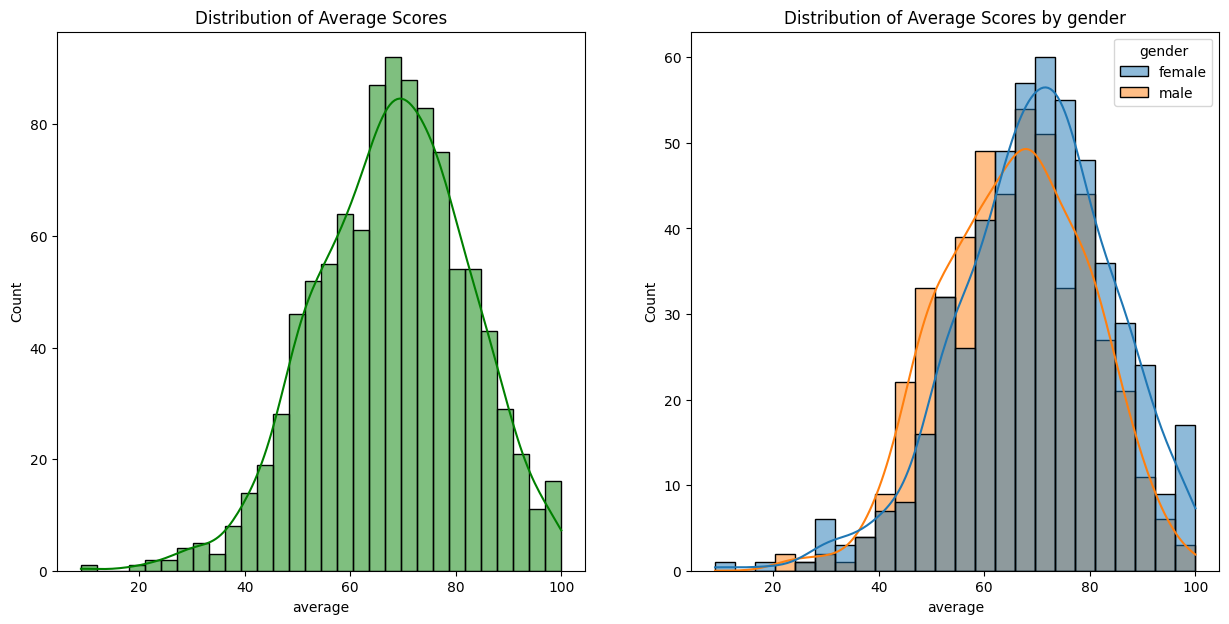

In [213]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
plt.title('Distribution of Average Scores')
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
plt.title('Distribution of Average Scores by gender')
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

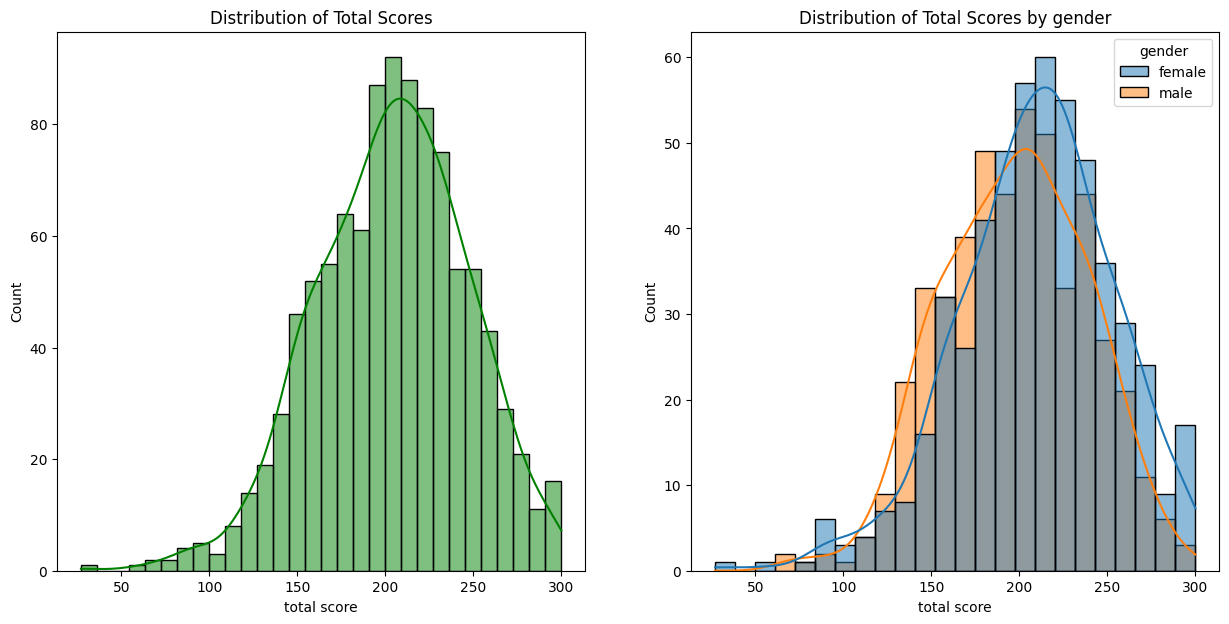

In [214]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
plt.title('Distribution of Total Scores')
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
plt.title('Distribution of Total Scores by gender')
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

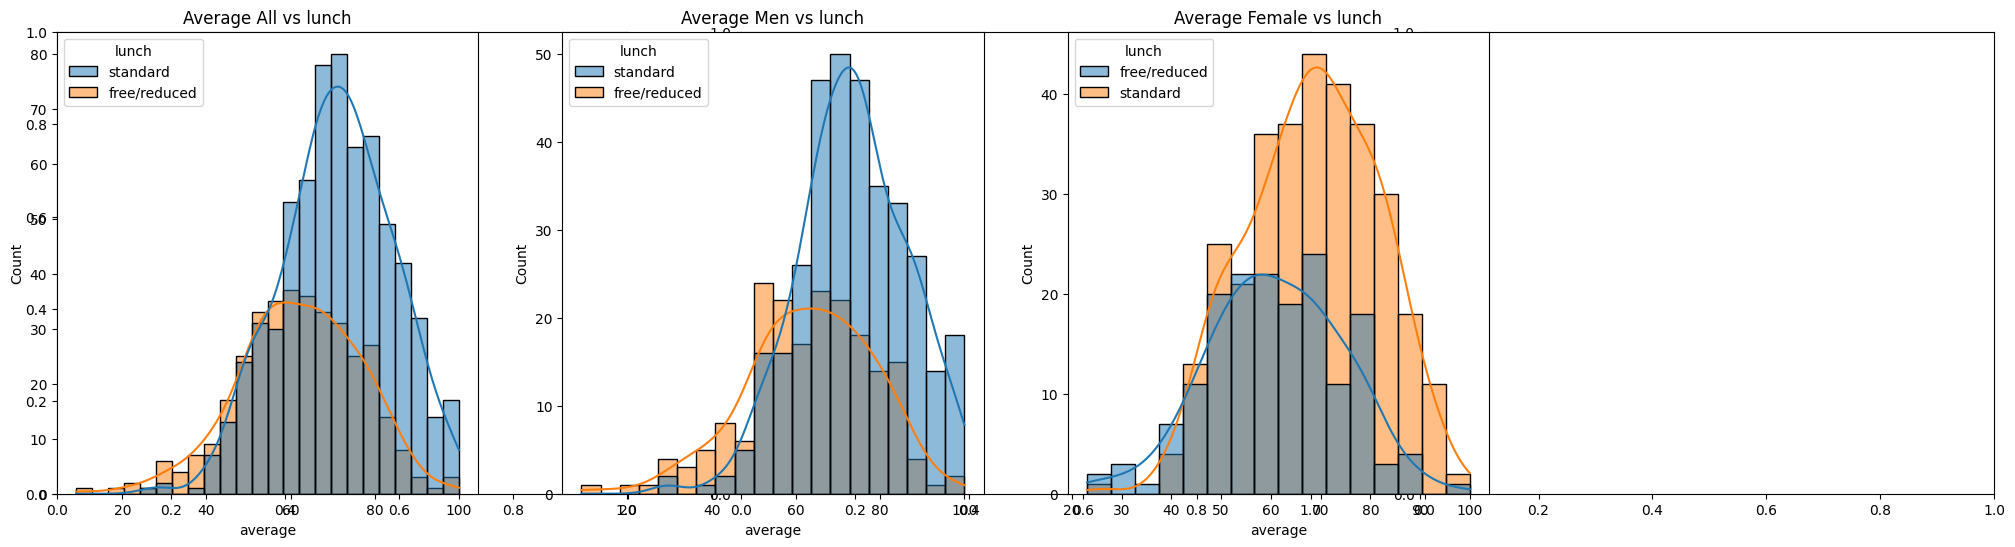

In [222]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('Average All vs lunch')
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)

plt.title('Average Men vs lunch')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)

plt.title('Average Female vs lunch')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

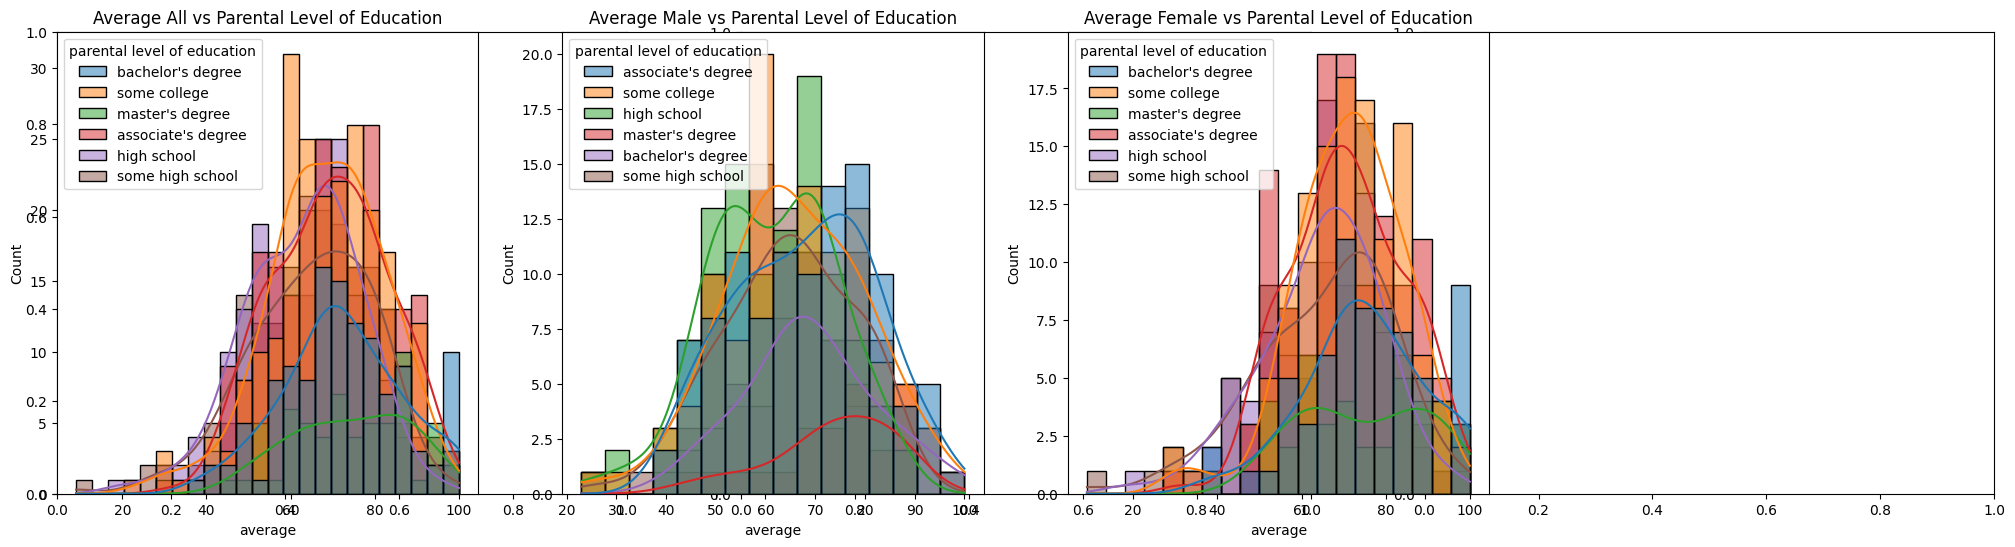

In [221]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('Average All vs Parental Level of Education')
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
plt.title('Average Male vs Parental Level of Education')
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
plt.title('Average Female vs Parental Level of Education')
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

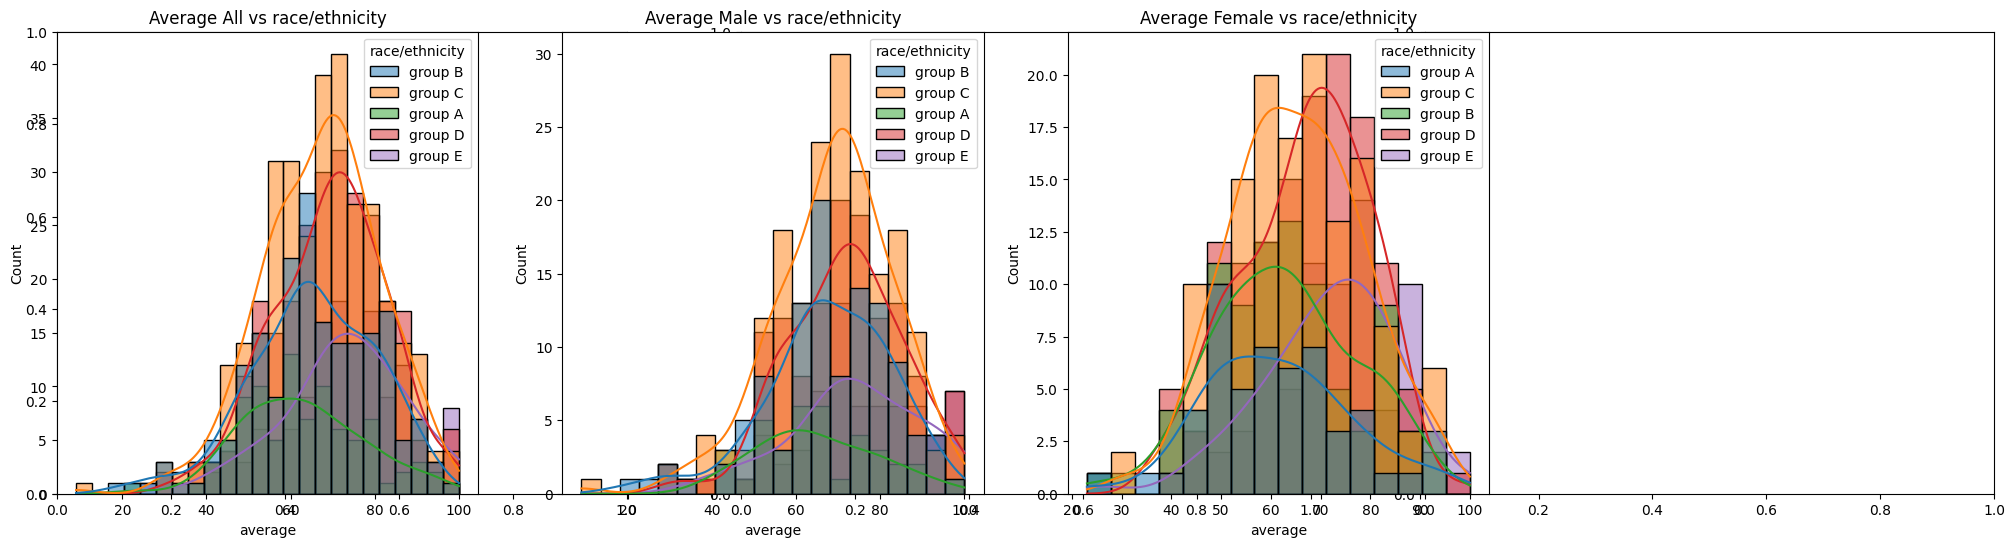

In [223]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('Average All vs race/ethnicity')
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
plt.title('Average Male vs race/ethnicity')
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
plt.title('Average Female vs race/ethnicity')
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group E tends to perform poorly in exam.
- Students of group A and group E tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

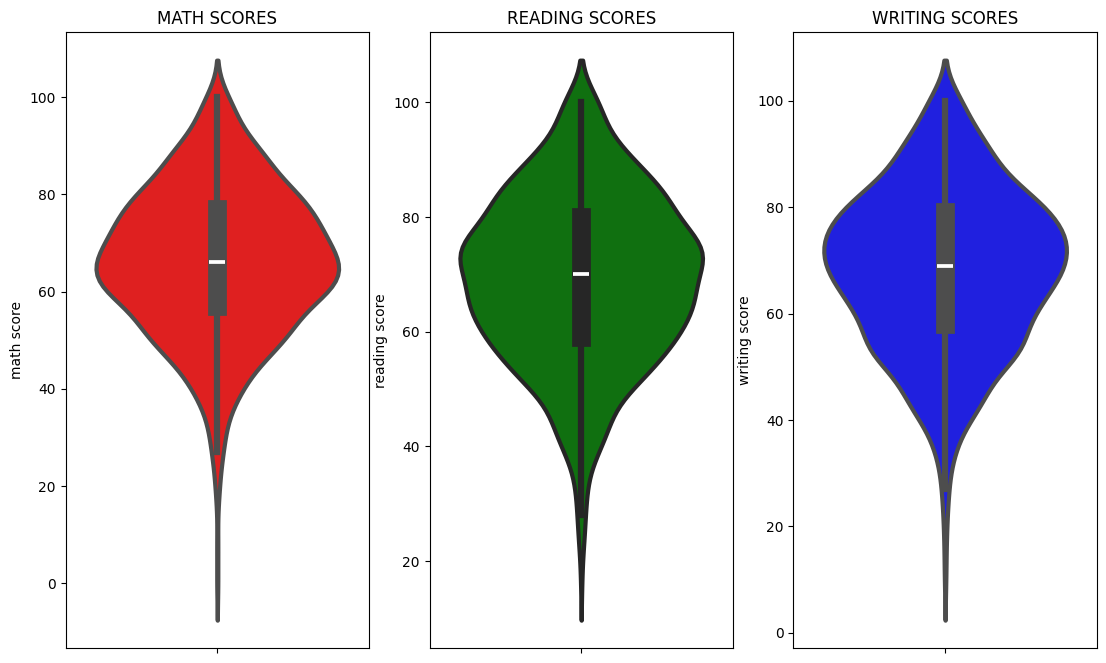

In [224]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

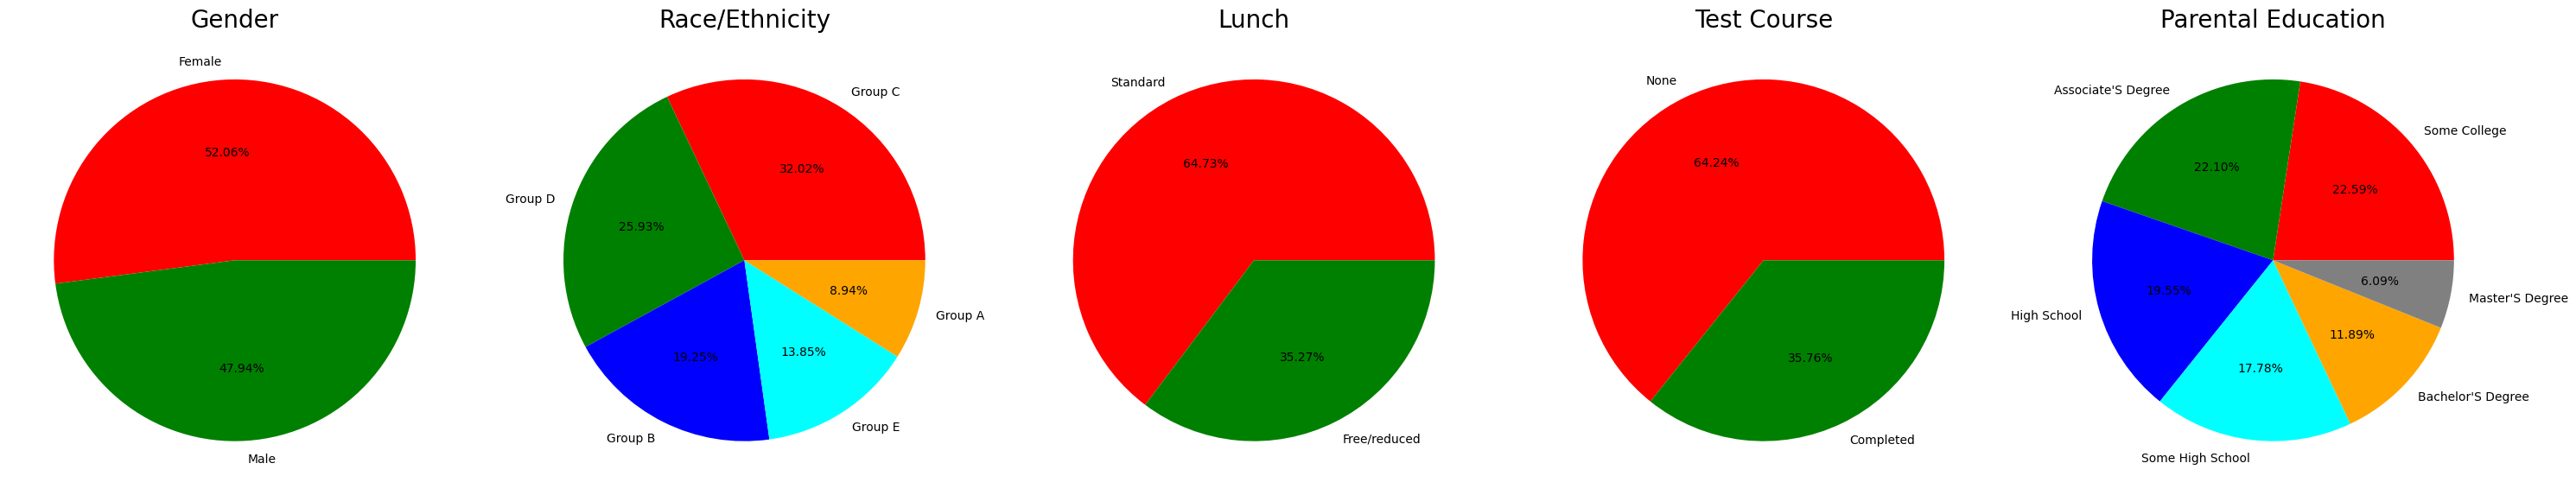

In [226]:
plt.rcParams['figure.figsize'] = (30, 12)

# Pie 1: Gender
plt.subplot(1, 5, 1)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, colors=['red', 'green'], labels=gender_counts.index.str.capitalize(), autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Pie 2: Race/Ethnicity
plt.subplot(1, 5, 2)
race_counts = df['race/ethnicity'].value_counts()
plt.pie(race_counts, colors=['red', 'green', 'blue', 'cyan', 'orange'], labels=race_counts.index.str.title(), autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Pie 3: Lunch
plt.subplot(1, 5, 3)
lunch_counts = df['lunch'].value_counts()
plt.pie(lunch_counts, colors=['red', 'green'], labels=lunch_counts.index.str.capitalize(), autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Pie 4: Test Preparation Course
plt.subplot(1, 5, 4)
prep_counts = df['test preparation course'].value_counts()
plt.pie(prep_counts, colors=['red', 'green'], labels=prep_counts.index.str.capitalize(), autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Pie 5: Parental Level of Education
plt.subplot(1, 5, 5)
parent_counts = df['parental level of education'].value_counts()
parent_labels = parent_counts.index.str.title()
plt.pie(parent_counts, colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey'], labels=parent_labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

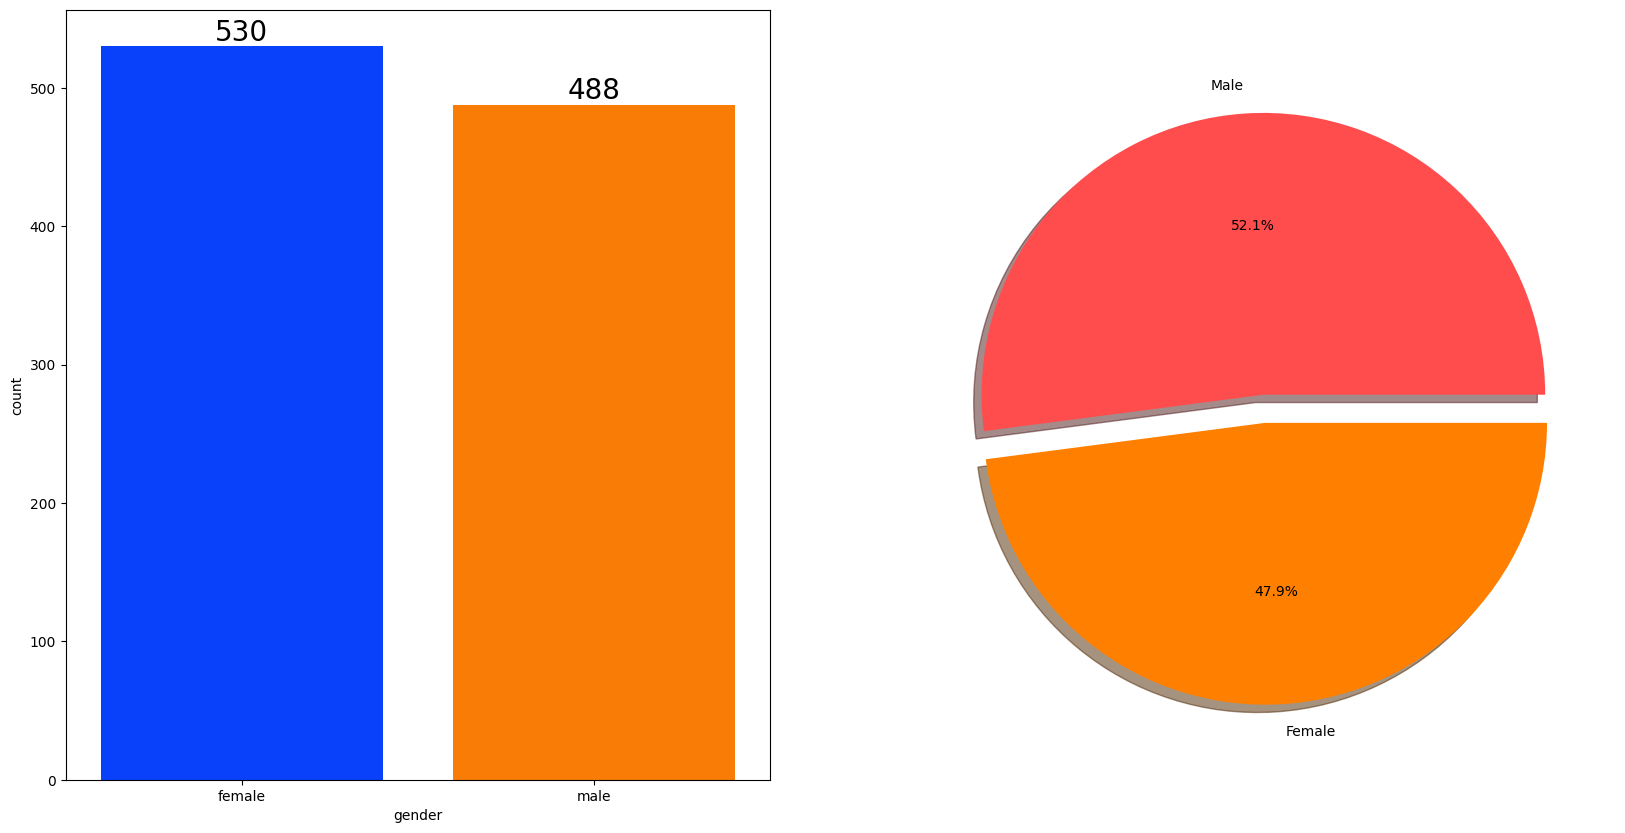

In [227]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 530 (48%) and male students are 488 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [231]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number']).columns
gender_group = df.groupby('gender')[numeric_cols].mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.805738,72.792453,72.632075,209.230267,69.743422
male,68.625000,65.412509,63.295082,197.332591,65.777530


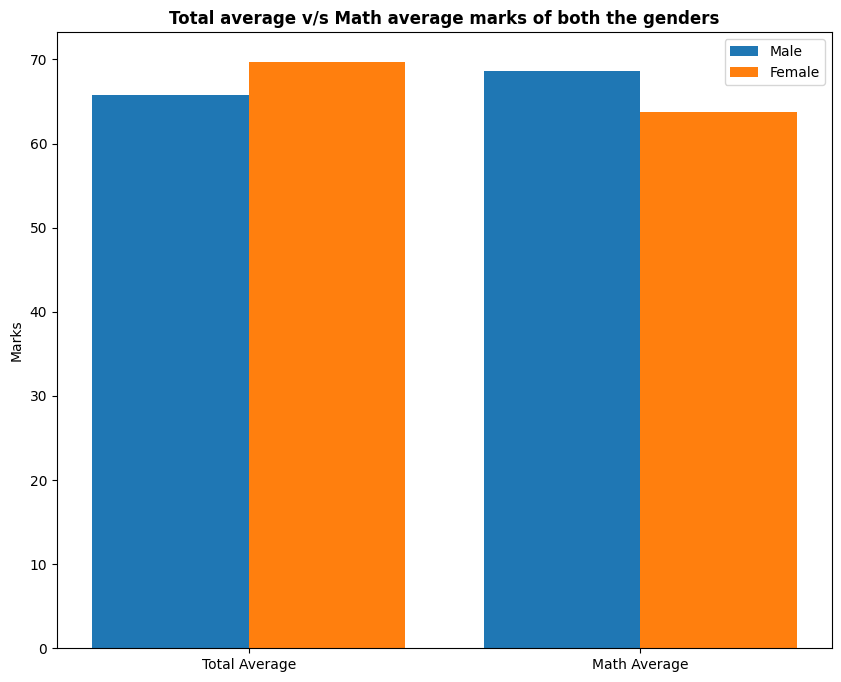

In [232]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

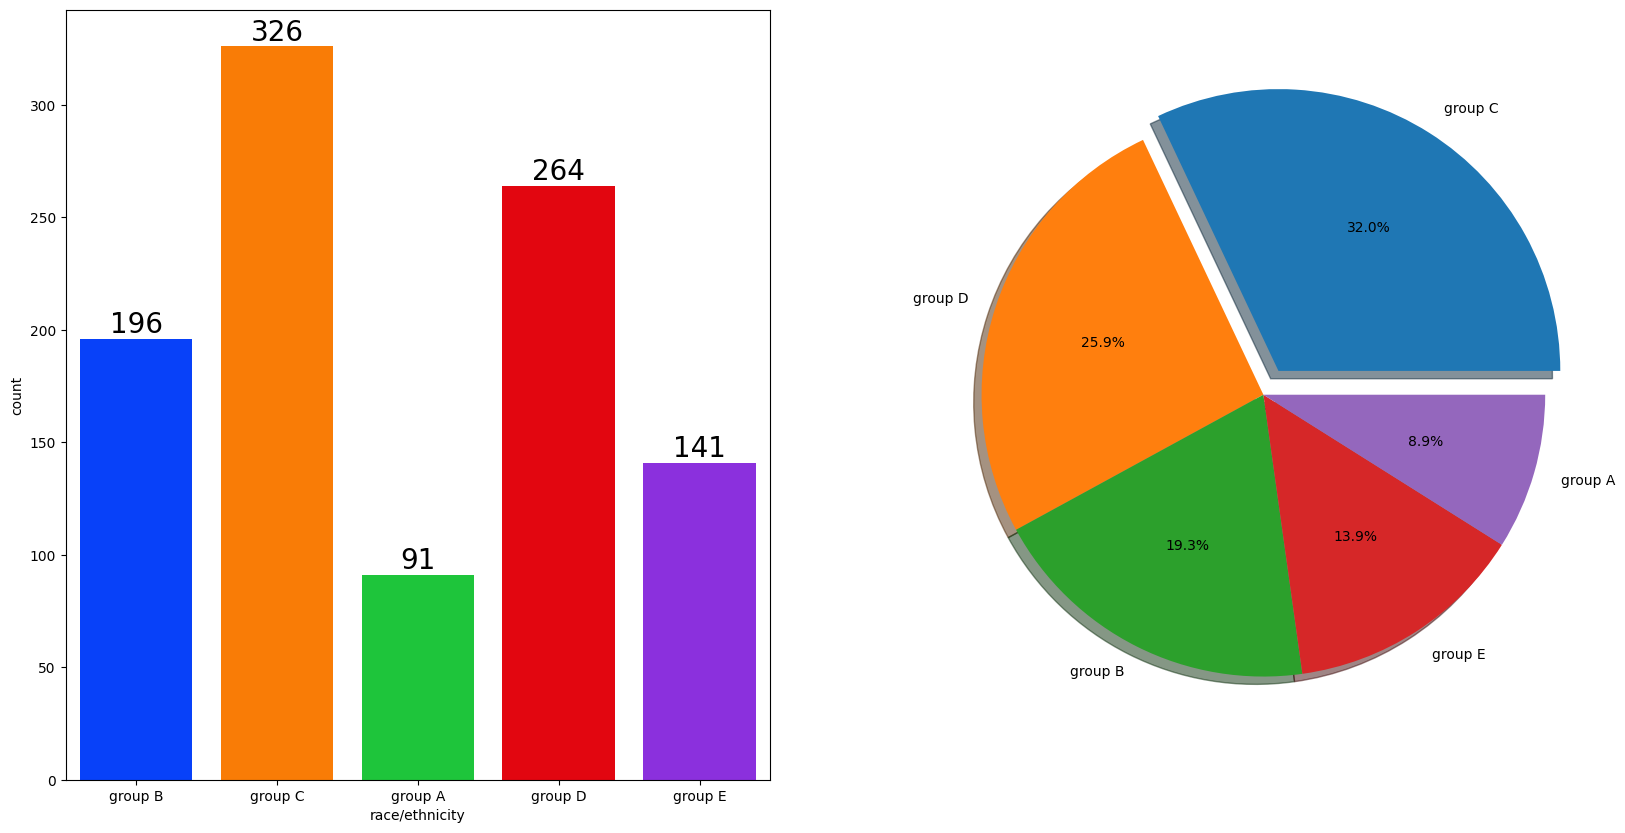

In [233]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

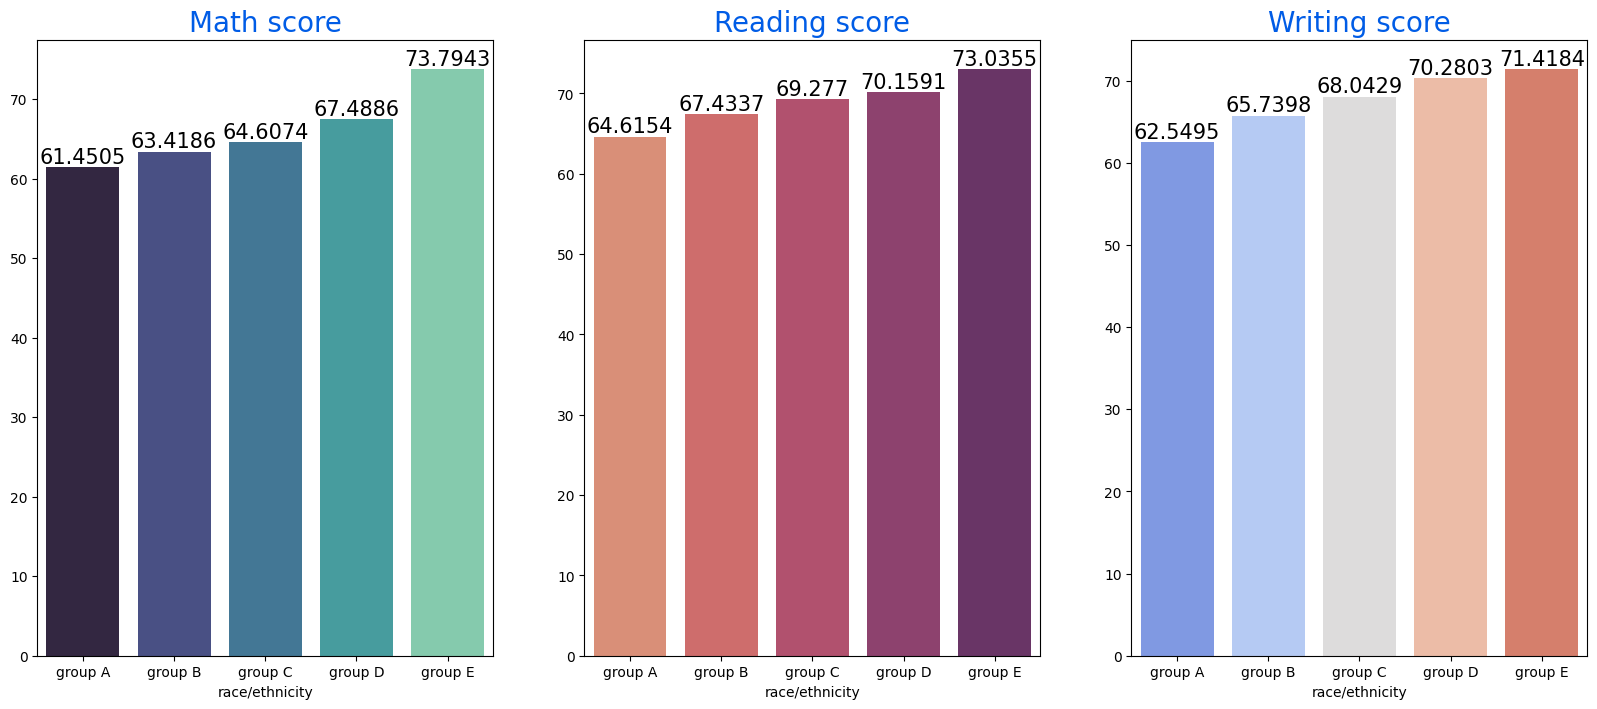

In [234]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

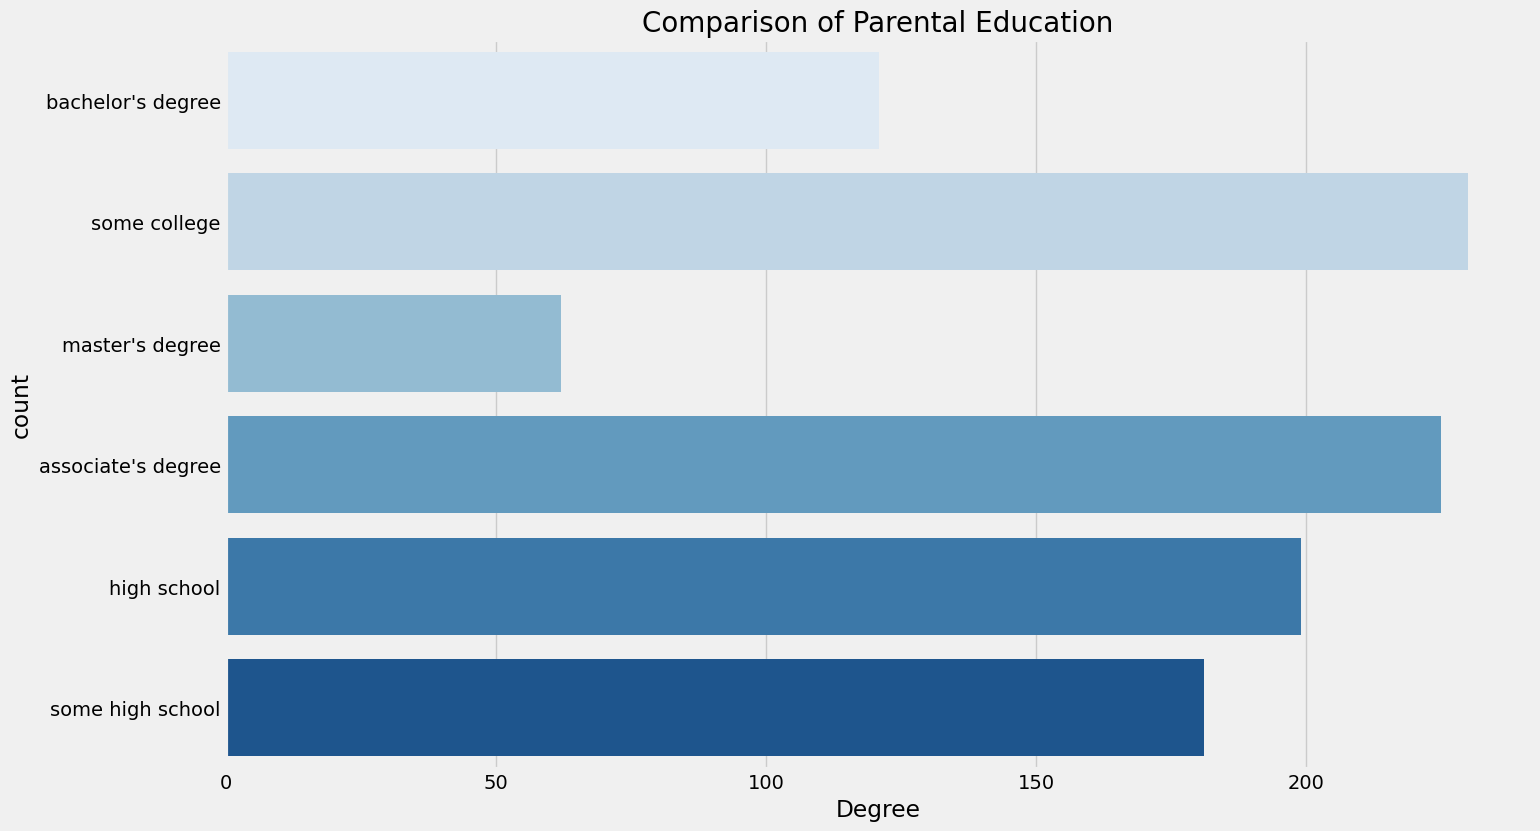

In [235]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [238]:
df.head()  # Display the first few rows of the dataframe to verify successful loading

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75,229.0,76.333333


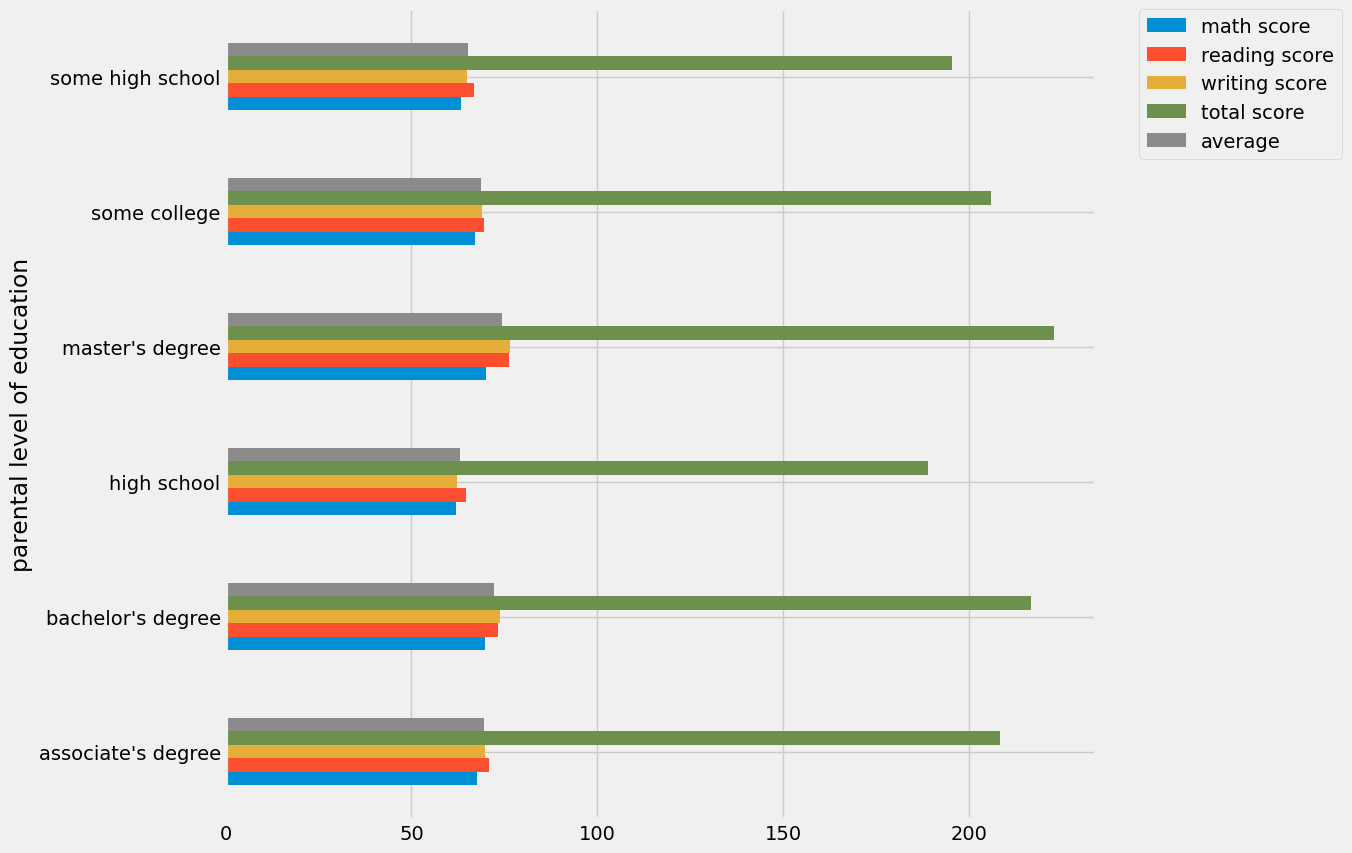

In [241]:
# Select only numeric columns for aggregation
df.groupby('parental level of education')[numeric_cols].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?



#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

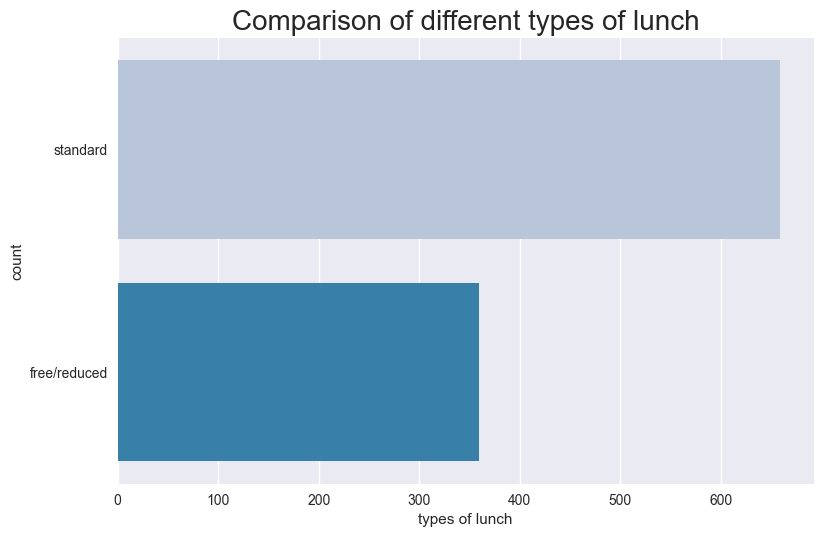

In [244]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

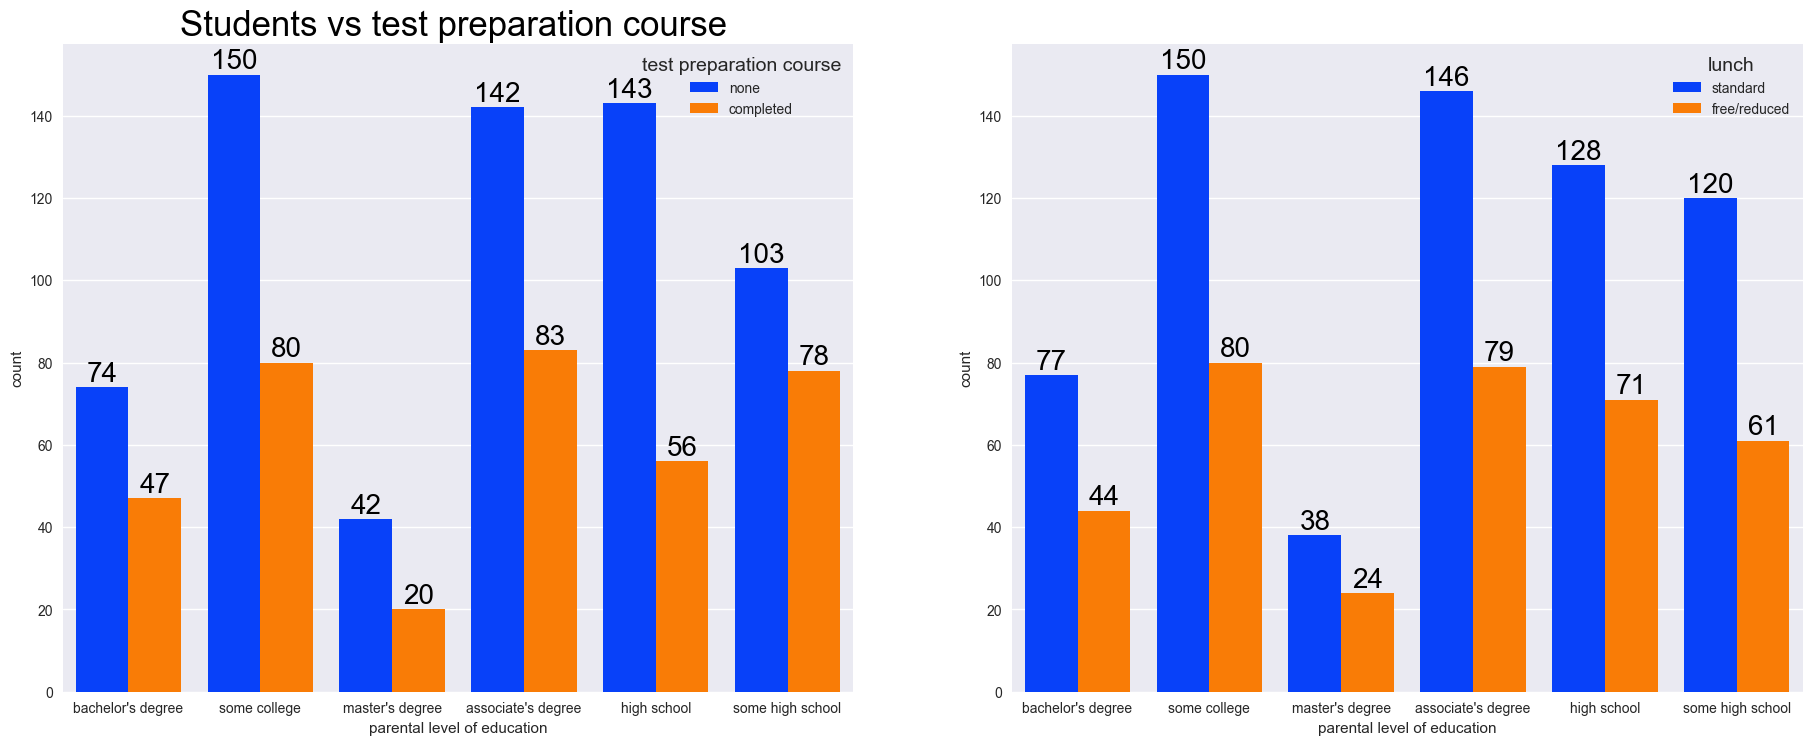

In [245]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

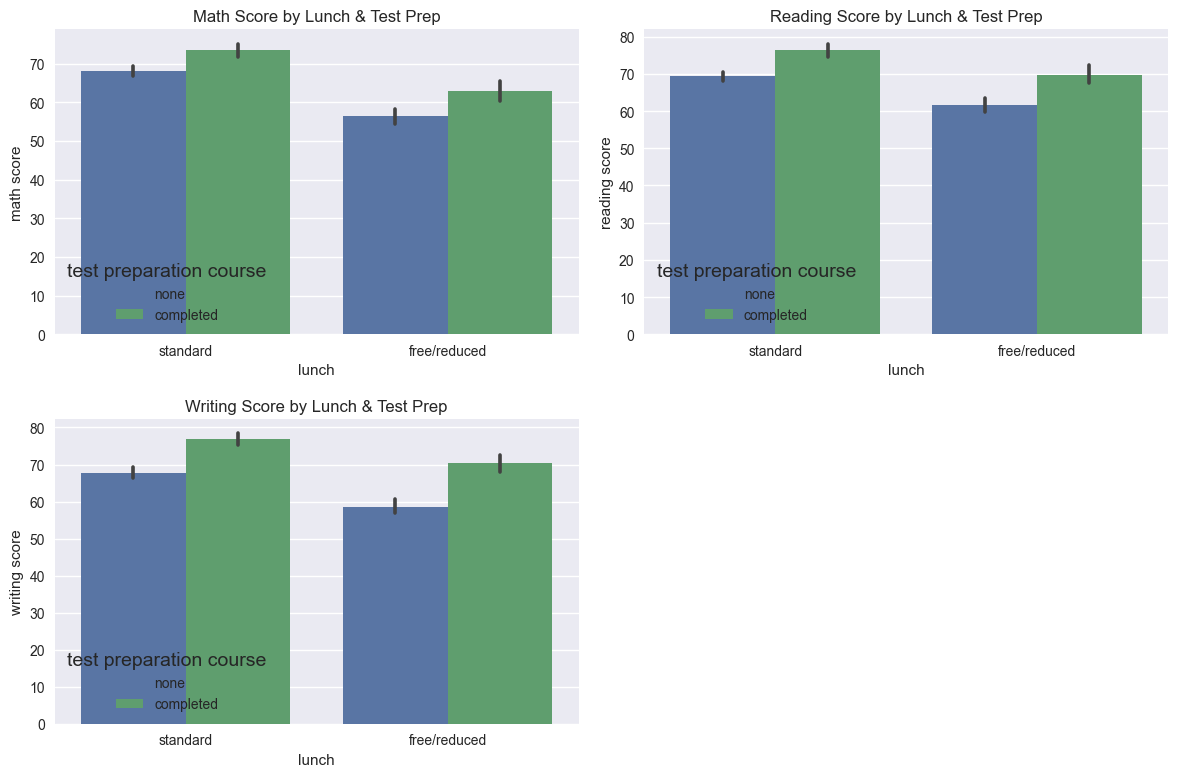

In [249]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df)
plt.title('Math Score by Lunch & Test Prep')

plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df)
plt.title('Reading Score by Lunch & Test Prep')

plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df)
plt.title('Writing Score by Lunch & Test Prep')

plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

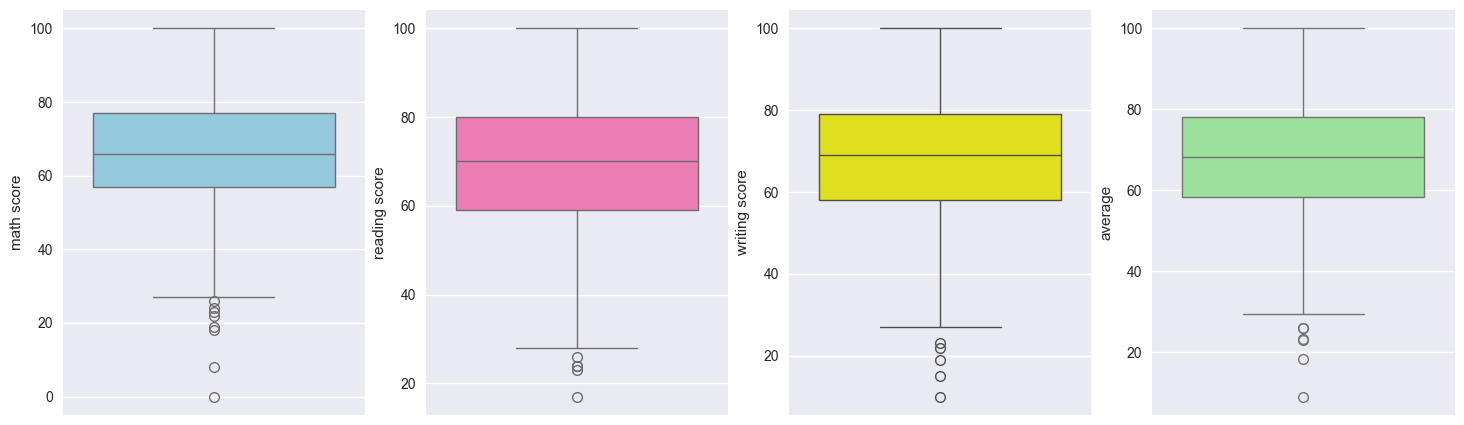

In [251]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

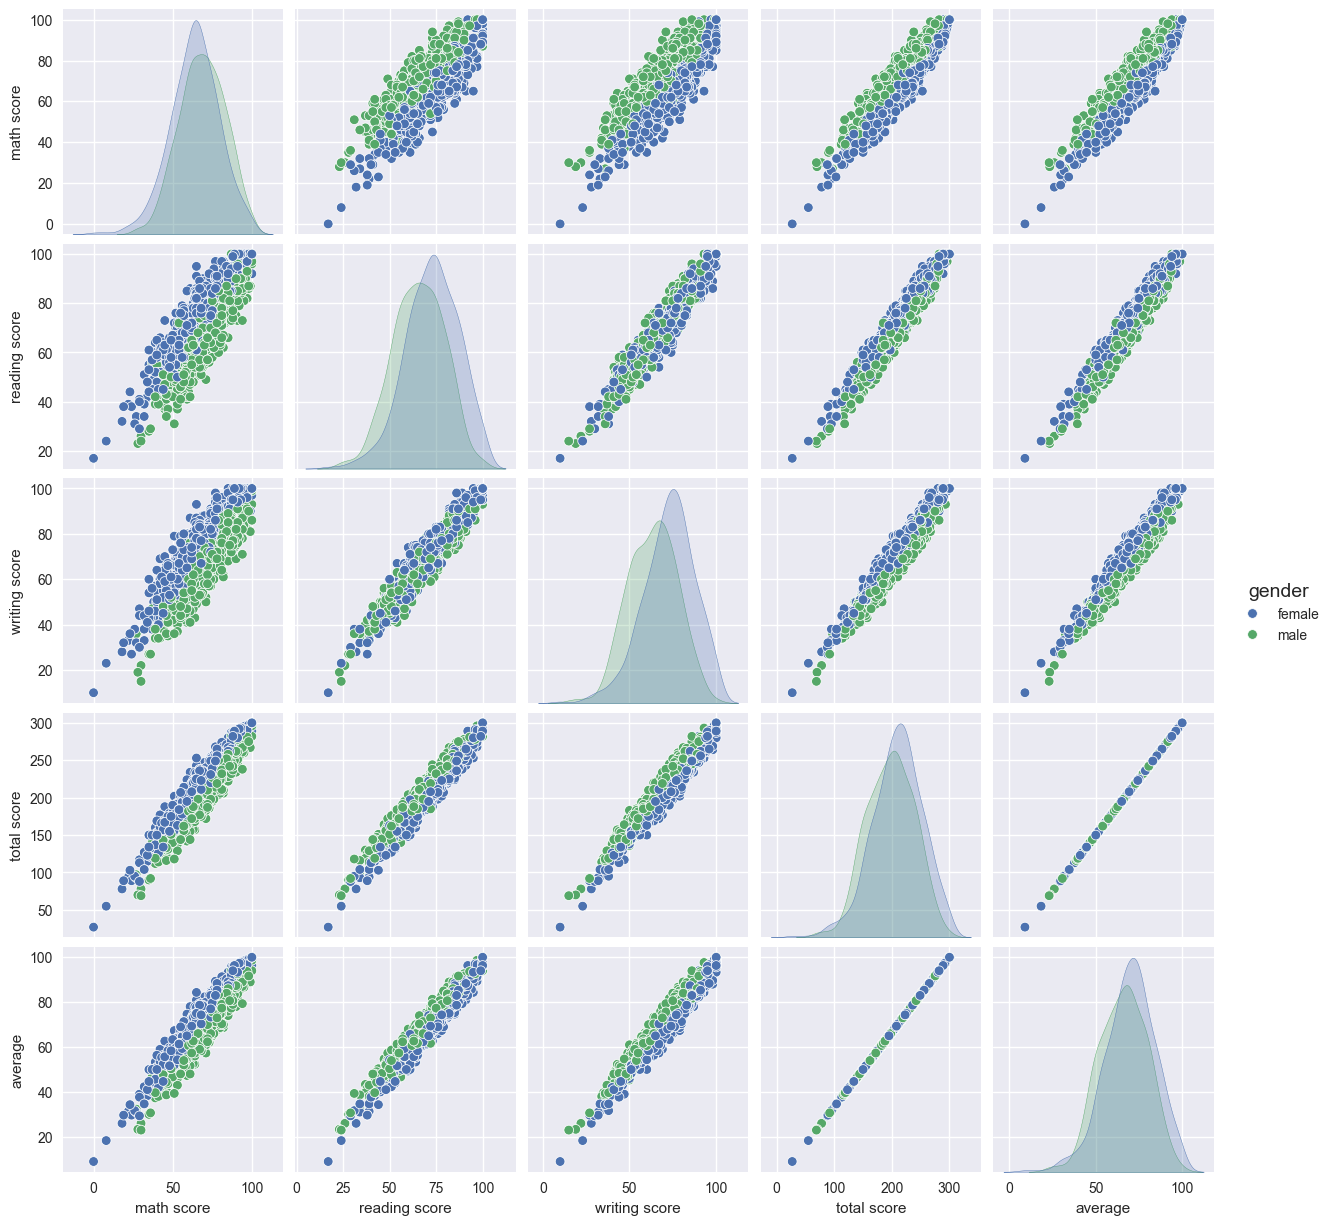

In [252]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [253]:
## Add underscore in column names if space is present
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores in column names

In [254]:
df.head()  # Display the first few rows of the dataframe to verify successful loading

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75,229.0,76.333333


In [257]:
##

df.to_csv('data/StudentsPerformance_cleaned.csv', index=False)  # Save the cleaned DataFrame to a new CSV file